<a href="https://colab.research.google.com/github/ashishar/q_character/blob/main/quantum%20computing%20series%20tutorial%20no1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.8 MB/s eta 0:00:00


In [3]:
### IMPORTANT: Make sure you are using python 3.10 or 3.11 for compatibility of the required packages
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [5]:

# Define the device
dev = qml.device('default.qubit', wires=1)


In [20]:
# Define the Hamiltonian parameters
omega = 1.0  # angular frequency
H = 0.5 * omega * qml.PauliZ(0)  # Hamiltonian


In [21]:
# Define the quantum node
@qml.qnode(dev)
def circuit(t):
    qml.Hadamard(wires=0)  # Initial state |+>
    qml.ApproxTimeEvolution(H, t, 1)
    return qml.expval(qml.PauliX(0)), qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(0))


In [22]:
# Time evolution parameters
times = np.linspace(0, 10, 100)
expectation_values = np.array([circuit(t) for t in times])


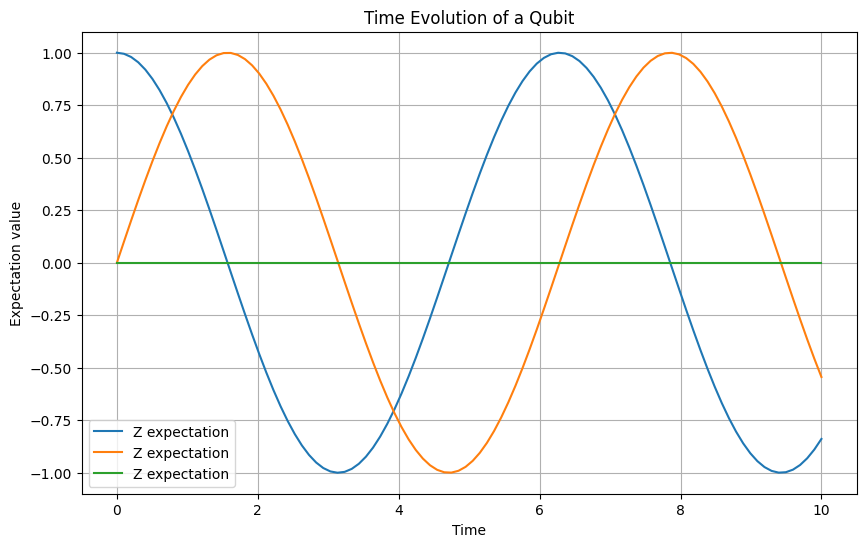

In [23]:

# Time evolution parameters
times = np.linspace(0, 10, 100)
expectation_values = np.array([circuit(t) for t in times])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times, expectation_values, label='Z expectation')
plt.xlabel('Time')
plt.ylabel('Expectation value')
plt.title('Time Evolution of a Qubit')
plt.legend()
plt.grid(True)
plt.show()